# 导入库

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json as json
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor as XGBR
from xgboost import XGBRFClassifier as XGBC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from lightgbm import LGBMRegressor as LGBR
from lightgbm import LGBMClassifier as LGBC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,KBinsDiscretizer
from sklearn.impute import SimpleImputer
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
import shap  
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.metrics import roc_curve, auc 

# 整理数据与生成数据

In [3]:
df = pd.read_csv("games.csv")
champions = pd.read_json("champion_info.json")
spells = pd.read_json("summoner_spell_info.json")

In [3]:
champ_names11 = [champions['data'].loc[y]['name'] for y in df.t1_champ1id]
champ_names12 = [champions['data'].loc[y]['name'] for y in df.t1_champ2id]
champ_names13 = [champions['data'].loc[y]['name'] for y in df.t1_champ3id]
champ_names14 = [champions['data'].loc[y]['name'] for y in df.t1_champ4id]
champ_names15 = [champions['data'].loc[y]['name'] for y in df.t1_champ5id]
champ_names21 = [champions['data'].loc[y]['name'] for y in df.t2_champ1id]
champ_names22 = [champions['data'].loc[y]['name'] for y in df.t2_champ2id]
champ_names23 = [champions['data'].loc[y]['name'] for y in df.t2_champ3id]
champ_names24 = [champions['data'].loc[y]['name'] for y in df.t2_champ4id]
champ_names25 = [champions['data'].loc[y]['name'] for y in df.t2_champ5id]

In [4]:
len(champ_names11)

51490

In [5]:
spells_names111 = [spells['data'].loc[y]['name'] for y in df.t1_champ1_sum1]
spells_names112 = [spells['data'].loc[y]['name'] for y in df.t1_champ1_sum2]
spells_names121 = [spells['data'].loc[y]['name'] for y in df.t1_champ2_sum1]
spells_names122 = [spells['data'].loc[y]['name'] for y in df.t1_champ2_sum2]
spells_names131 = [spells['data'].loc[y]['name'] for y in df.t1_champ3_sum1]
spells_names132 = [spells['data'].loc[y]['name'] for y in df.t1_champ3_sum2]
spells_names141 = [spells['data'].loc[y]['name'] for y in df.t1_champ4_sum1]
spells_names142 = [spells['data'].loc[y]['name'] for y in df.t1_champ4_sum2]
spells_names151 = [spells['data'].loc[y]['name'] for y in df.t1_champ5_sum1]
spells_names152 = [spells['data'].loc[y]['name'] for y in df.t1_champ5_sum2]
spells_names211 = [spells['data'].loc[y]['name'] for y in df.t2_champ1_sum1]
spells_names212 = [spells['data'].loc[y]['name'] for y in df.t2_champ1_sum2]
spells_names221 = [spells['data'].loc[y]['name'] for y in df.t2_champ2_sum1]
spells_names222 = [spells['data'].loc[y]['name'] for y in df.t2_champ2_sum2]
spells_names231 = [spells['data'].loc[y]['name'] for y in df.t2_champ3_sum1]
spells_names232 = [spells['data'].loc[y]['name'] for y in df.t2_champ3_sum2]
spells_names241 = [spells['data'].loc[y]['name'] for y in df.t2_champ4_sum1]
spells_names242 = [spells['data'].loc[y]['name'] for y in df.t2_champ4_sum2]
spells_names251 = [spells['data'].loc[y]['name'] for y in df.t2_champ5_sum1]
spells_names252 = [spells['data'].loc[y]['name'] for y in df.t2_champ5_sum2]

In [6]:
c11 = pd.DataFrame(np.column_stack([champ_names11, np.repeat(1, len(df)), np.repeat(1, len(df))]), 
            columns=["name", "team", "champ"])
c12 = pd.DataFrame(np.column_stack([champ_names12, np.repeat(1, len(df)), np.repeat(2, len(df))]), 
            columns=["name", "team", "champ"])
c13 = pd.DataFrame(np.column_stack([champ_names13, np.repeat(1, len(df)), np.repeat(3, len(df))]), 
            columns=["name", "team", "champ"])
c14 = pd.DataFrame(np.column_stack([champ_names14, np.repeat(1, len(df)), np.repeat(4, len(df))]), 
            columns=["name", "team", "champ"])
c15 = pd.DataFrame(np.column_stack([champ_names15, np.repeat(1, len(df)), np.repeat(5, len(df))]), 
            columns=["name", "team", "champ"])

c21 = pd.DataFrame(np.column_stack([champ_names21, np.repeat(2, len(df)), np.repeat(1, len(df))]), 
            columns=["name", "team", "champ"])
c22 = pd.DataFrame(np.column_stack([champ_names22, np.repeat(2, len(df)), np.repeat(2, len(df))]), 
            columns=["name", "team", "champ"])
c23 = pd.DataFrame(np.column_stack([champ_names23, np.repeat(2, len(df)), np.repeat(3, len(df))]), 
            columns=["name", "team", "champ"])
c24 = pd.DataFrame(np.column_stack([champ_names24, np.repeat(2, len(df)), np.repeat(4, len(df))]), 
            columns=["name", "team", "champ"])
c25 = pd.DataFrame(np.column_stack([champ_names25, np.repeat(2, len(df)), np.repeat(5, len(df))]), 
            columns=["name", "team", "champ"])
comb_names = pd.DataFrame(np.vstack([c11, c12, c13, c14, c15, c21, c22, c23, c24, c25]),
                         columns=["name", "team", "champ"])

In [7]:
comb_names['count'] = comb_names.groupby('name')['name'].transform('count')

In [16]:
t1s1 = pd.DataFrame(np.column_stack([spells_names111, spells_names112, np.repeat(1, len(df)), np.repeat(1, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s2 = pd.DataFrame(np.column_stack([spells_names121, spells_names122, np.repeat(1, len(df)), np.repeat(2, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s3 = pd.DataFrame(np.column_stack([spells_names131, spells_names132, np.repeat(1, len(df)), np.repeat(3, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s4 = pd.DataFrame(np.column_stack([spells_names141, spells_names142, np.repeat(1, len(df)), np.repeat(4, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s5 = pd.DataFrame(np.column_stack([spells_names151, spells_names152, np.repeat(1, len(df)), np.repeat(5, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])

t2s1 = pd.DataFrame(np.column_stack([spells_names211, spells_names212, np.repeat(2, len(df)), np.repeat(1, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s2 = pd.DataFrame(np.column_stack([spells_names221, spells_names222, np.repeat(2, len(df)), np.repeat(2, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s3 = pd.DataFrame(np.column_stack([spells_names231, spells_names232, np.repeat(2, len(df)), np.repeat(3, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s4 = pd.DataFrame(np.column_stack([spells_names241, spells_names242, np.repeat(2, len(df)), np.repeat(4, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s5 = pd.DataFrame(np.column_stack([spells_names251, spells_names252, np.repeat(2, len(df)), np.repeat(5, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
comb_spells = pd.DataFrame(np.vstack([t1s1, t1s2, t1s3, t1s4, t1s5,
                                     t2s1, t2s2, t2s3, t2s4, t2s5]), 
                          columns=["sum1", "sum2", "team", "champ"])

In [9]:
t1s1 = pd.DataFrame(np.column_stack([spells_names111, spells_names112, np.repeat(1, len(df)), np.repeat(1, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s2 = pd.DataFrame(np.column_stack([spells_names121, spells_names122, np.repeat(1, len(df)), np.repeat(2, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s3 = pd.DataFrame(np.column_stack([spells_names131, spells_names132, np.repeat(1, len(df)), np.repeat(3, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s4 = pd.DataFrame(np.column_stack([spells_names141, spells_names142, np.repeat(1, len(df)), np.repeat(4, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t1s5 = pd.DataFrame(np.column_stack([spells_names151, spells_names152, np.repeat(1, len(df)), np.repeat(5, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])

t2s1 = pd.DataFrame(np.column_stack([spells_names211, spells_names212, np.repeat(2, len(df)), np.repeat(1, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s2 = pd.DataFrame(np.column_stack([spells_names221, spells_names222, np.repeat(2, len(df)), np.repeat(2, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s3 = pd.DataFrame(np.column_stack([spells_names231, spells_names232, np.repeat(2, len(df)), np.repeat(3, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s4 = pd.DataFrame(np.column_stack([spells_names241, spells_names242, np.repeat(2, len(df)), np.repeat(4, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
t2s5 = pd.DataFrame(np.column_stack([spells_names251, spells_names252, np.repeat(2, len(df)), np.repeat(5, len(df))]), 
            columns=["sum1", "sum2", "team", "champ"])
comb_spells = pd.DataFrame(np.vstack([t1s1, t1s2, t1s3, t1s4, t1s5,
                                     t2s1, t2s2, t2s3, t2s4, t2s5]), 
                          columns=["sum1", "sum2", "team", "champ"])

In [17]:
comb_spells['count_1'] = comb_spells.groupby(['sum1'])['sum1'].transform('count')
comb_spells['count_2'] = comb_spells.groupby(['sum2'])['sum2'].transform('count')
comb_spells['combination'] = list(comb_spells['sum1']+comb_spells['sum2'])
comb_spells['count_3'] = comb_spells.groupby(['combination'])['combination'].transform('count')

In [46]:
c11 = pd.DataFrame(np.column_stack([ np.repeat(1, len(df)),df['winner'],champ_names11,champ_names12,champ_names13,champ_names14,champ_names15,]), 
            columns=["team", "win","name1","name2","name3","name4","name5"])
c12 = pd.DataFrame(np.column_stack([ np.repeat(2, len(df)),df['winner'],champ_names21,champ_names22,champ_names23,champ_names24,champ_names25,]), 
            columns=["team", "win","name1","name2","name3","name4","name5"])
wholeteam = pd.concat([c11,c12])
wholeteam = wholeteam.reset_index()
wholeteam.drop(['index'],axis=1,inplace=True)

,index,team,win,name1,name2,name3,name4,name5
0,0,1,1,Vladimir,Bard,Kog'Maw,Master Yi,Viktor
1,1,1,1,Draven,Irelia,Nidalee,Kayle,Shaco
2,2,1,1,Tristana,Kayn,Nami,Rumble,Kassadin
3,3,1,1,Maokai,Brand,Twitch,Orianna,Dr. Mundo
4,4,1,1,Warwick,Twitch,Janna,Draven,Syndra
...,...,...,...,...,...,...,...,...
102975,51485,2,2,Veigar,Yorick,Vayne,Janna,Gragas
102976,51486,2,2,Shyvana,Kalista,Leona,Nasus,Veigar
102977,51487,2,2,Annie,Draven,Rammus,Karma,Lux
102978,51488,2,2,Miss Fortune,Nocturne,Morgana,Karthus,Master Yi


In [54]:
winteam = wholeteam[wholeteam['win']==wholeteam['team']]
loseteam = wholeteam[wholeteam['win']!=wholeteam['team']]
winteam = winteam.reset_index()
winteam.drop(['index'],axis=1,inplace=True)
loseteam = loseteam.reset_index()
loseteam.drop(['index'],axis=1,inplace=True)

# 频率统计

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


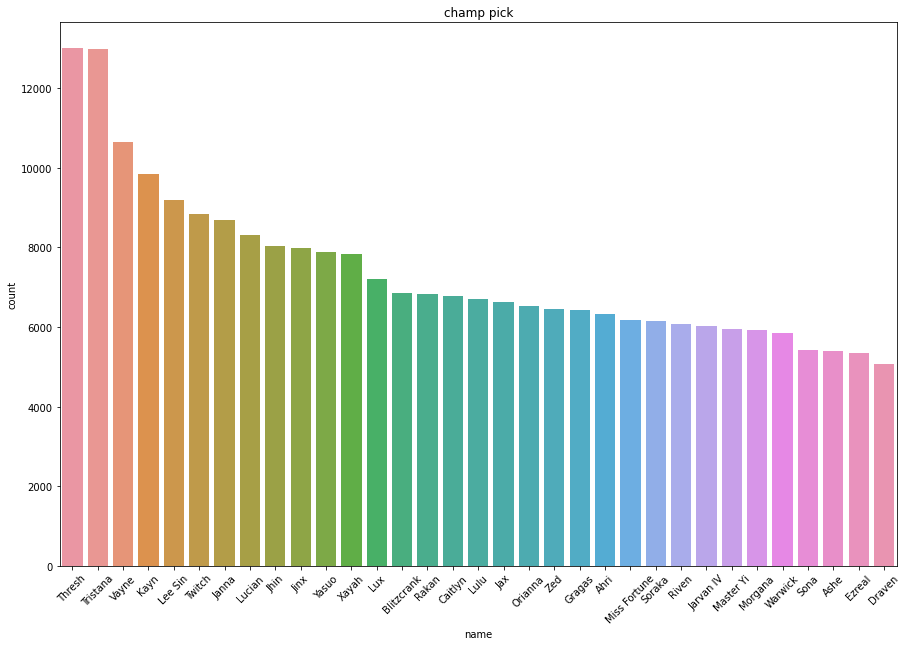

In [19]:
plt.figure(figsize=(15,10))
comb_names = comb_names.sort_values(by='count',ascending=False)
sns.countplot(comb_names[comb_names['count']>=5000]['name'])
plt.xticks(rotation=45)
plt.title("champ pick")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'summoner_spell_1 count')

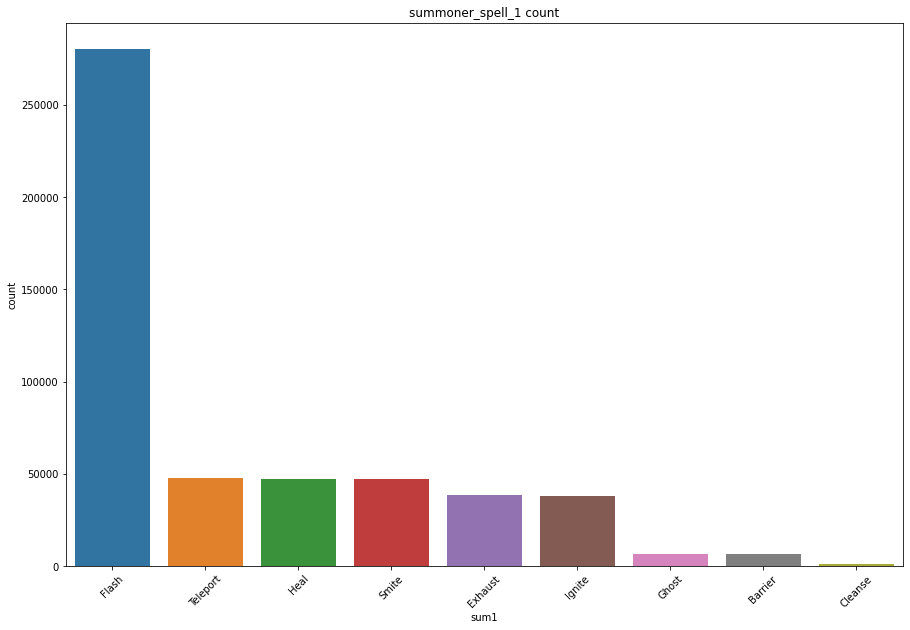

In [12]:
comb_spells = comb_spells.sort_values(by = 'count_1',ascending = False)
plt.figure(figsize =[15,10])
sns.countplot(comb_spells['sum1'])
plt.xticks(rotation =45)
plt.title("summoner_spell_1 count")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'summoner_spell_2 count')

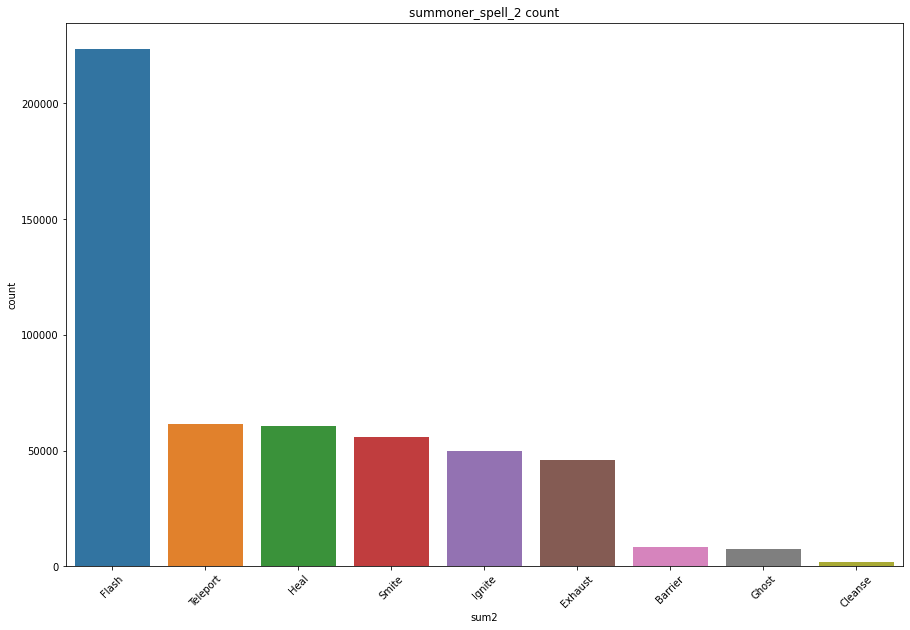

In [13]:
comb_spells = comb_spells.sort_values(by = 'count_2',ascending = False)
plt.figure(figsize =[15,10])
sns.countplot(comb_spells['sum2'])
plt.xticks(rotation =45)
plt.title("summoner_spell_2 count")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'summoner_spell_combination count')

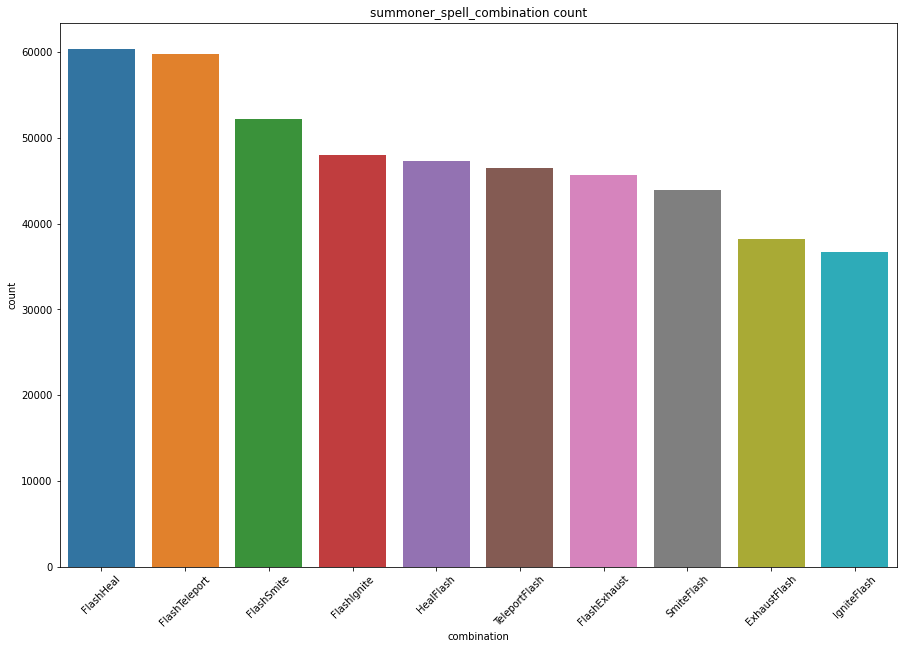

In [15]:
plt.figure(figsize =[15,10])
comb_spells = comb_spells.sort_values(by = ['count_3'],ascending=False)
sns.countplot(comb_spells[comb_spells['count_3']>30000]['combination'])
plt.xticks(rotation =45)
plt.title("summoner_spell_combination count")

# 关联规则

运用apriori算法对英雄联盟玩家选择英雄的偏好进行分析，并且分析出胜场队伍和败场队伍的选择偏好

In [ ]:
frequent_itemsets_3 = apriori(team_1.iloc[:,2:],min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets_2, metric='lift',min_threshold=1)
rules [ (rules['antecedent support'] >0.01)&(rules['confidence']> 0.8)  ]

In [69]:
wholeteam_f = wholeteam.iloc[:,:2]
wholeteam_a = wholeteam_f.join(pd.get_dummies(wholeteam.iloc[:,2:]))
winteam_f = winteam.iloc[:,:2]
winteam_a = winteam_f.join(pd.get_dummies(winteam.iloc[:,2:]))
loseteam_f = loseteam.iloc[:,:2]
loseteam_a = loseteam_f.join(pd.get_dummies(loseteam.iloc[:,2:]))

In [114]:
frequent_itemsets = apriori(wholeteam_a.iloc[:400,2:],min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift',min_threshold=1)
rules [ (rules['antecedent support'] >0.02)&(rules['confidence']> 0.2)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(name3_Jinx),(name1_Gnar),0.0225,0.0250,0.0050,0.222222,8.888889,0.004438,1.253571
13,(name5_Jinx),(name1_Gnar),0.0225,0.0250,0.0050,0.222222,8.888889,0.004438,1.253571
20,(name4_Rakan),(name1_Jax),0.0225,0.0250,0.0050,0.222222,8.888889,0.004438,1.253571
25,(name1_Kayn),(name2_Riven),0.0225,0.0125,0.0050,0.222222,17.777778,0.004719,1.269643
26,(name1_Kayn),(name4_Jhin),0.0225,0.0200,0.0050,0.222222,11.111111,0.004550,1.260000
59,(name5_Jinx),(name1_Shaco),0.0225,0.0100,0.0050,0.222222,22.222222,0.004775,1.272857
61,(name2_Rakan),(name1_Sivir),0.0225,0.0075,0.0050,0.222222,29.629630,0.004831,1.276071
62,(name2_Ezreal),(name1_Thresh),0.0225,0.0350,0.0050,0.222222,6.349206,0.004213,1.240714
82,(name1_Vayne),(name2_Thresh),0.0225,0.0325,0.0050,0.222222,6.837607,0.004269,1.243929
84,(name1_Vayne),(name3_LeBlanc),0.0225,0.0075,0.0050,0.222222,29.629630,0.004831,1.276071


In [102]:
frequent_itemsets_win = apriori(winteam_a.iloc[:600,2:],min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets_win, metric='lift',min_threshold=1)
rules [ (rules['antecedent support'] >0.01)&(rules['confidence']> 0.2)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(name1_Lulu),(name2_Jinx),0.021667,0.020000,0.005000,0.230769,11.538462,0.004567,1.274000
1,(name2_Jinx),(name1_Lulu),0.020000,0.021667,0.005000,0.250000,11.538462,0.004567,1.304444
2,(name2_Vayne),(name1_Thresh),0.023333,0.028333,0.005000,0.214286,7.563025,0.004339,1.236667
5,(name2_Gnar),(name1_Tristana),0.015000,0.035000,0.005000,0.333333,9.523810,0.004475,1.447500
7,(name2_Sona),(name1_Tristana),0.030000,0.035000,0.006667,0.222222,6.349206,0.005617,1.240714
8,(name2_Gangplank),(name1_Twisted Fate),0.011667,0.016667,0.005000,0.428571,25.714286,0.004806,1.720833
9,(name1_Twisted Fate),(name2_Gangplank),0.016667,0.011667,0.005000,0.300000,25.714286,0.004806,1.411905
10,(name4_Jinx),(name2_Cassiopeia),0.021667,0.011667,0.005000,0.230769,19.780220,0.004747,1.284833
11,(name2_Cassiopeia),(name4_Jinx),0.011667,0.021667,0.005000,0.428571,19.780220,0.004747,1.712083
12,(name2_Sejuani),(name3_Zed),0.011667,0.018333,0.005000,0.428571,23.376623,0.004786,1.717917


In [107]:
frequent_itemsets_lose = apriori(loseteam_a.iloc[:400,2:],min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets_lose, metric='lift',min_threshold=1)
rules [ (rules['antecedent support'] >0.02)&(rules['confidence']> 0.2)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(name2_Lee Sin),(name1_Gnar),0.0225,0.0200,0.0050,0.222222,11.111111,0.004550,1.260000
47,(name3_Thresh),(name1_Renekton),0.0225,0.0100,0.0050,0.222222,22.222222,0.004775,1.272857
58,(name1_Vayne),(name5_Akali),0.0225,0.0100,0.0050,0.222222,22.222222,0.004775,1.272857
60,(name1_Vayne),(name5_Riven),0.0225,0.0200,0.0050,0.222222,11.111111,0.004550,1.260000
85,(name2_Lee Sin),(name3_Twitch),0.0225,0.0250,0.0050,0.222222,8.888889,0.004438,1.253571
146,(name3_Xayah),(name4_Rakan),0.0275,0.0300,0.0075,0.272727,9.090909,0.006675,1.333750
147,(name4_Rakan),(name3_Xayah),0.0300,0.0275,0.0075,0.250000,9.090909,0.006675,1.296667


# 相关性分析

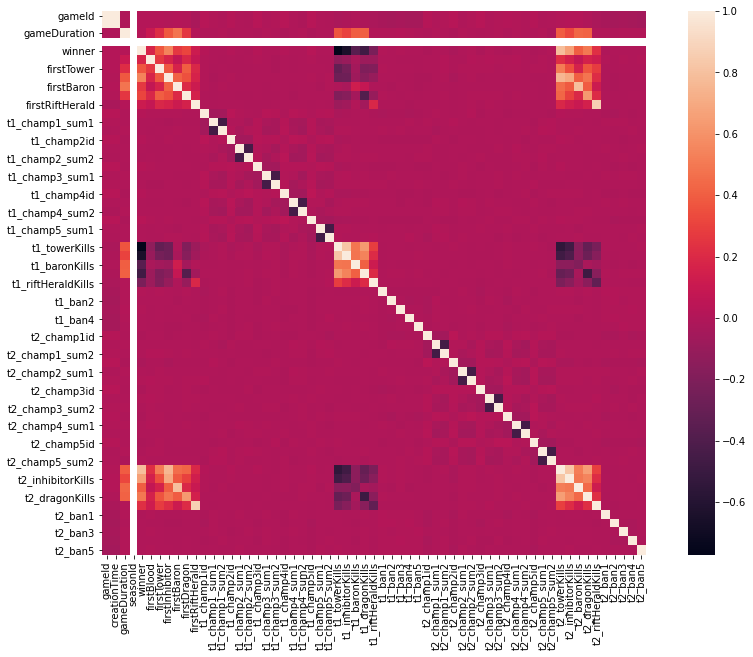

In [115]:
corrmat = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corrmat, square=True)
plt.show()

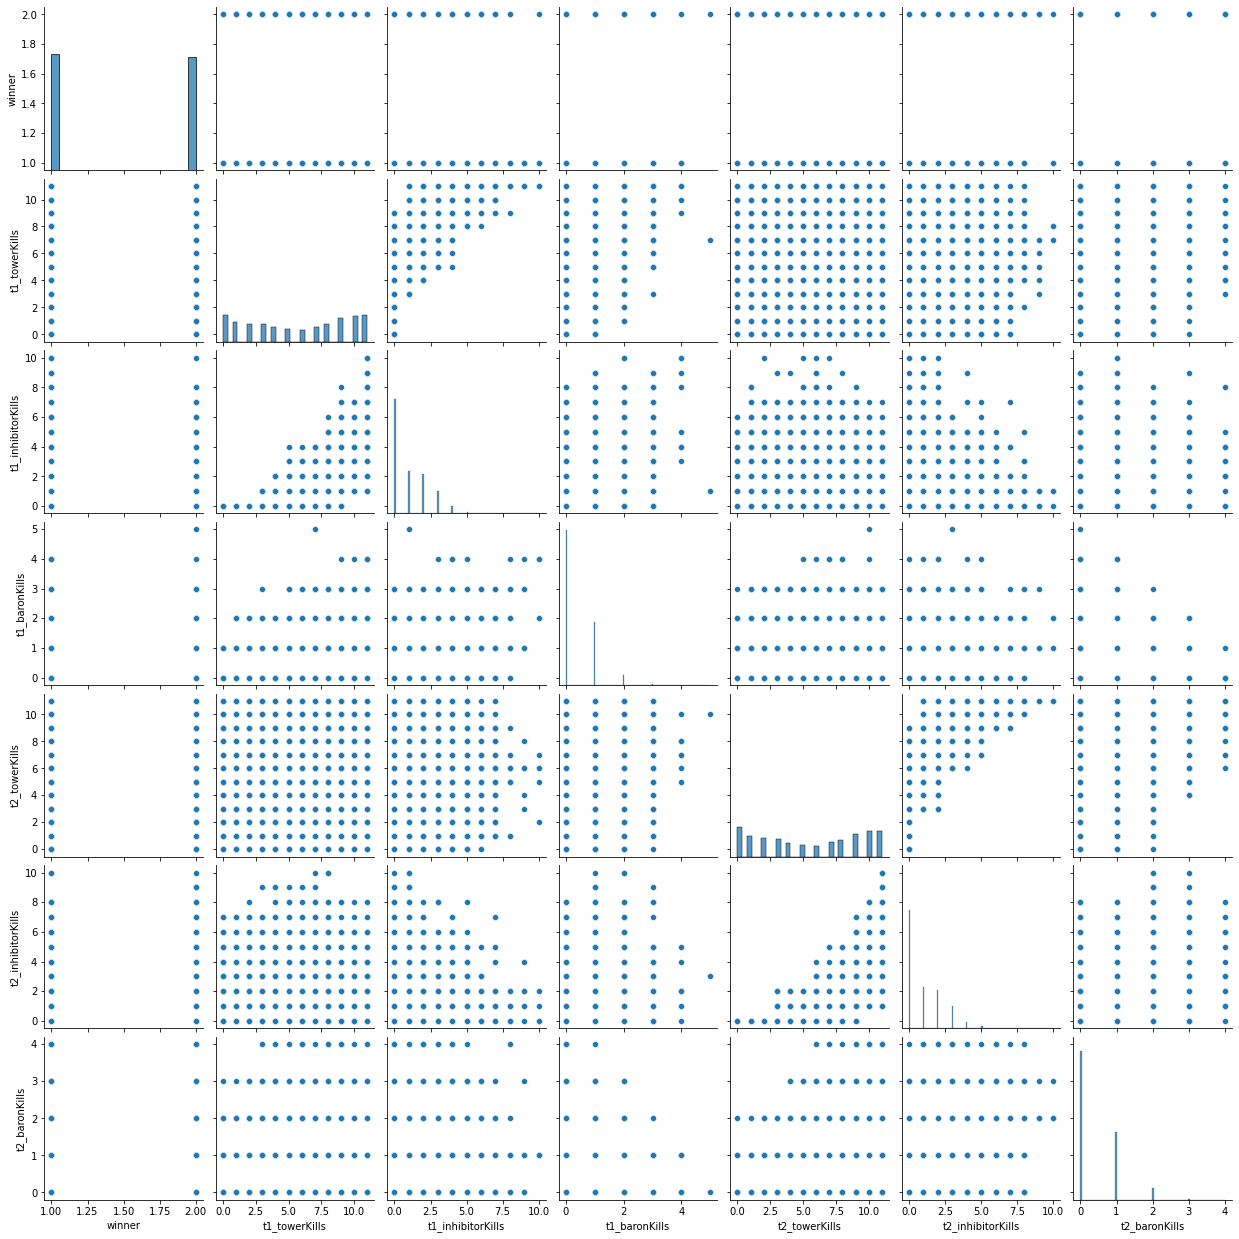

In [4]:
cols = ['winner','t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills',]
sns.pairplot(df[cols])
plt.show()

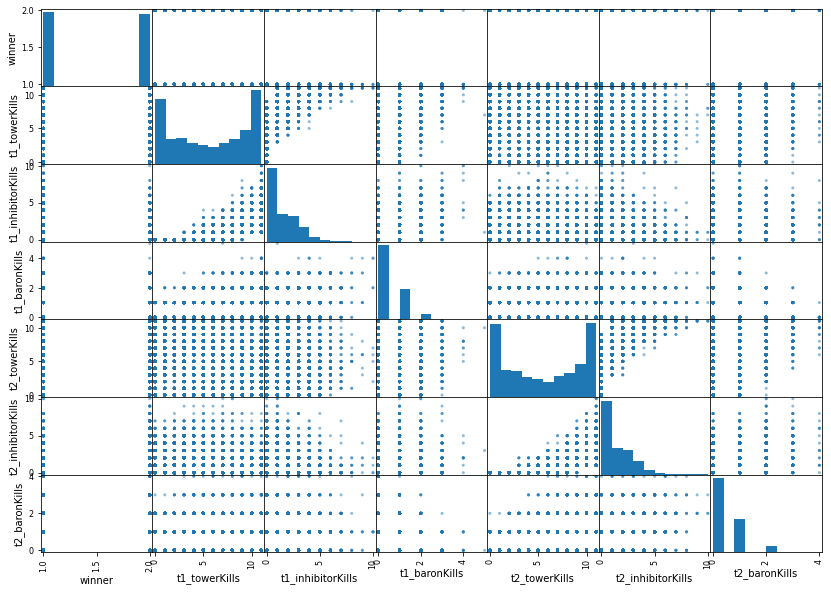

In [5]:
from pandas.plotting import scatter_matrix

atttibutes = ['winner','t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills']
scatter_matrix(df[atttibutes],figsize=(14,10))
plt.show()

# 特征选择

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(['gameId', 'seasonId', 'winner'], 1)
y = df['winner']

X_std = StandardScaler().fit_transform(X)
n_components = 5
X_std = X_std[:2000]
pca = PCA(n_components=n_components).fit(X_std)
Target = y[:2000]
X_5d = pca.transform(X_std)

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_5d[Target==1,0], y=X_5d[Target==1,1],
                     mode='markers',
                     name='team1'))
fig.add_trace(go.Scatter(x=X_5d[Target==2,0], y = X_5d[Target==2,1],
                     mode='markers',
                     name='team2'))
fig.update_layout(
    title="WIN VS LOSE",     # 主标题
    xaxis_title="PCA feature1",  # 2个坐标轴的标题
    yaxis_title="PCA fearure2",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)# KMeans clustering 
X_clustered = kmeans.fit_predict(X_5d)
X_clustered

array([0, 0, 0, ..., 0, 1, 0])

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_5d[X_clustered==0,0], y=X_5d[X_clustered==0,1],
                     mode='markers',
                     name='team1'))
fig.add_trace(go.Scatter(x=X_5d[X_clustered==1,0], y = X_5d[X_clustered==1,1],
                     mode='markers',
                     name='team2'))
fig.update_layout(
    title="WIN VS LOSE",     # 主标题
    xaxis_title="PCA feature1",  # 2个坐标轴的标题
    yaxis_title="PCA fearure2",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=200, n_jobs=0, num_parallel_tree=200,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)
R^2 0.9689260050495242
MSE 0.03107399495047582
importance [2.5631315e-03 8.1495782e-03 1.1458649e-02 2.1221260e-02 4.5094993e-03
 3.4556205e-03 9.0242462e-04 3.9614789e-04 7.1136979e-04 4.0547861e-04
 5.3793925e-04 7.9242192e-04 1.6688433e-03 4.3732155e-04 1.7677958e-03
 5.3447986e-04 6.5931334e-04 8.3783554e-04 5.1771931e-04 1.1337533e-03
 2.7375945e-04 1.4361575e-03 1.5841796e-01 4.0598486e-02 5.4111104e-03
 1.7165849e-02 1.0267886e-03 6.7

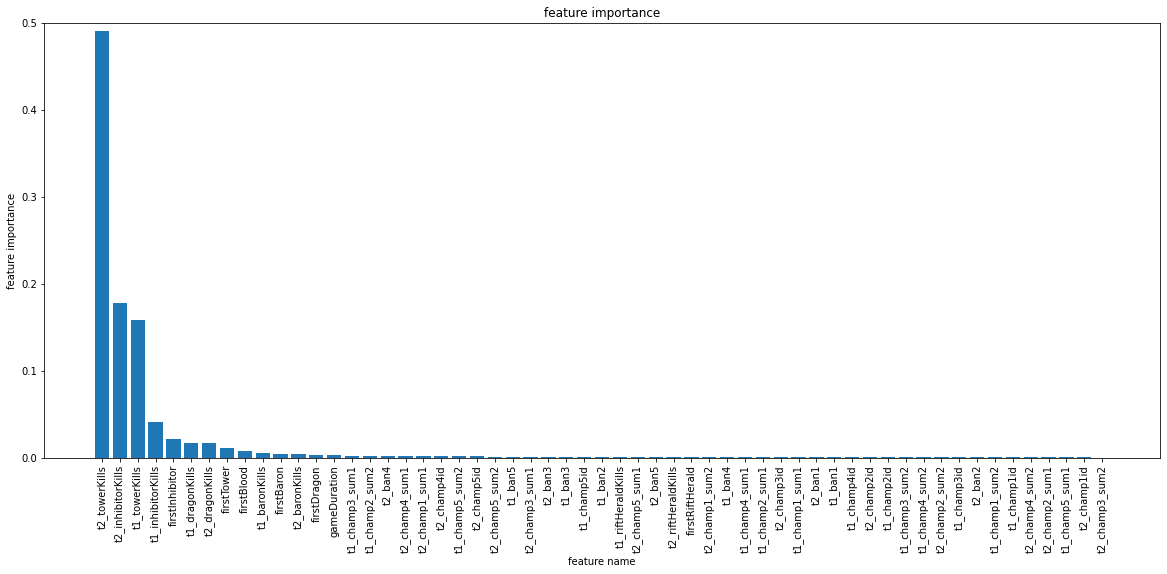

In [8]:
X = df.drop(['creationTime','gameId', 'seasonId', 'winner'], 1)
Y = df['winner']
X_std = StandardScaler().fit_transform(X)
Xtrain,Xtest,Ytrain,Ytest = TTS(X_std,Y,test_size=0.1,random_state=420)
#
reg = XGBC(n_estimators=200).fit(Xtrain,Ytrain) #训练
print(reg)
reg.predict(Xtest) #传统接口predict
print("R^2",reg.score(Xtest,Ytest))#R^2评估指标
print("MSE",MSE(Ytest,reg.predict(Xtest)))
print("importance",reg.feature_importances_)
imp = pd.DataFrame({'cols':X.columns,'imp':reg.feature_importances_}).sort_values('imp',ascending=False)
plt.bar(imp['cols'], imp['imp'])
plt.xticks(range(imp.shape[0]),imp['cols'],rotation=90)
plt.ylim(0,0.5)
plt.xlabel("feature name")
plt.ylabel("feature importance")
plt.title("feature importance")
plt.rcParams['figure.figsize'] = (20.0, 8.0) 

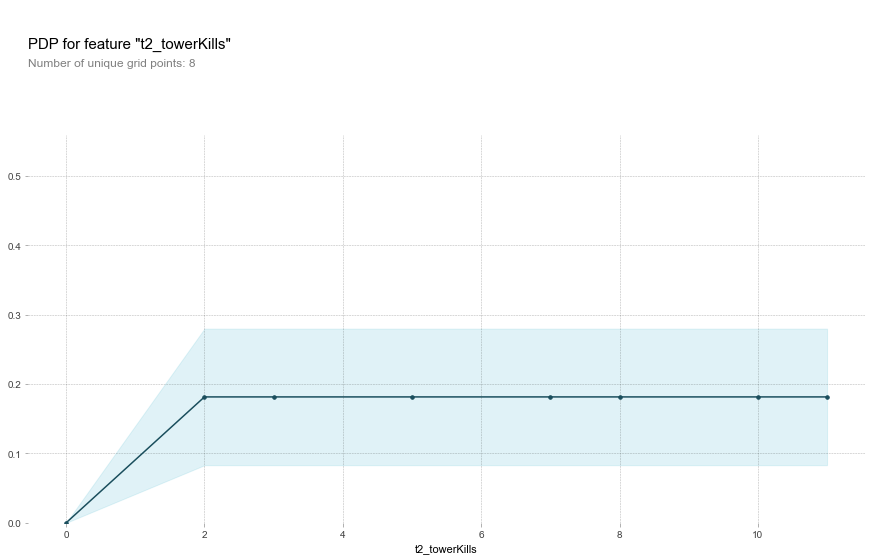

In [17]:

pdp_goals = pdp.pdp_isolate(model=reg, dataset=X, model_features=X.columns.to_list(), feature='t2_towerKills')

pdp.pdp_plot(pdp_goals, 't2_towerKills')
plt.show()

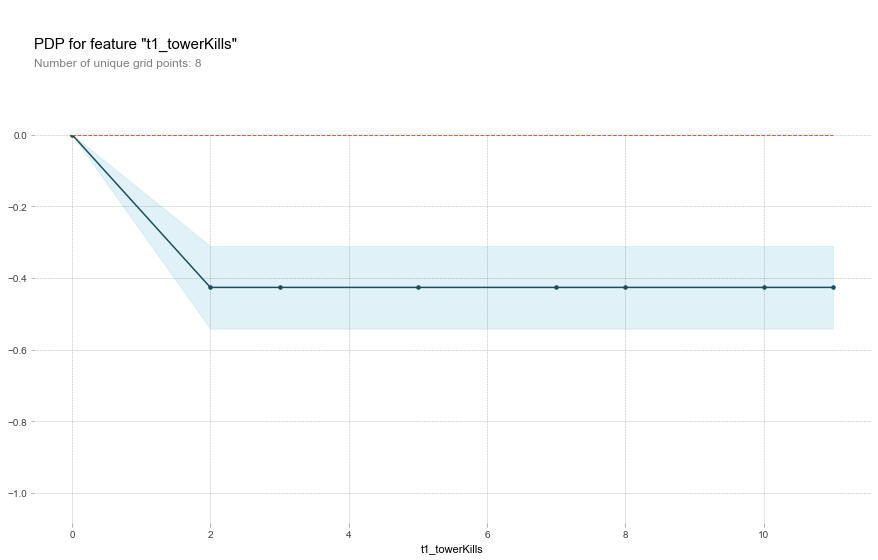

In [202]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

pdp_goals = pdp.pdp_isolate(model=reg, dataset=X, model_features=X.columns.to_list(), feature='t1_towerKills')

pdp.pdp_plot(pdp_goals, 't1_towerKills')
plt.show()

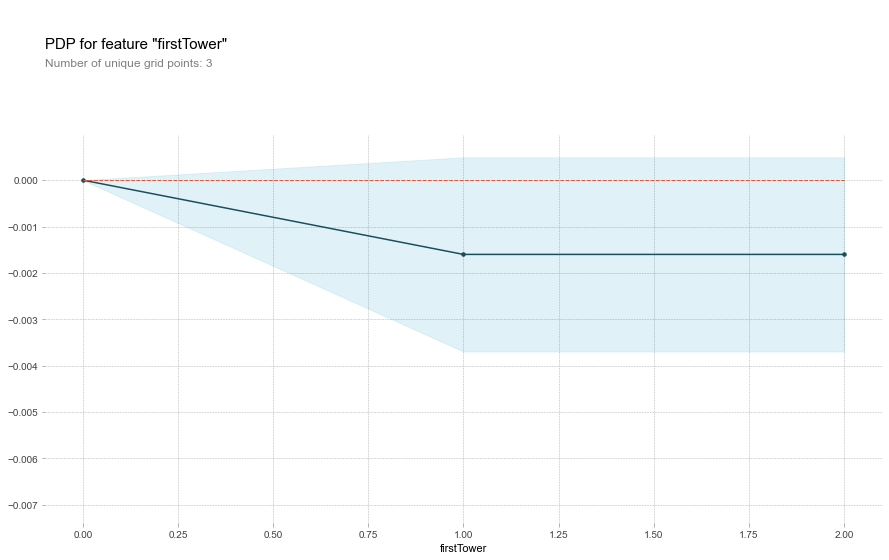

In [12]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

pdp_goals = pdp.pdp_isolate(model=reg, dataset=X, model_features=X.columns.to_list(), feature='firstTower')

pdp.pdp_plot(pdp_goals, 'firstTower')
plt.show()

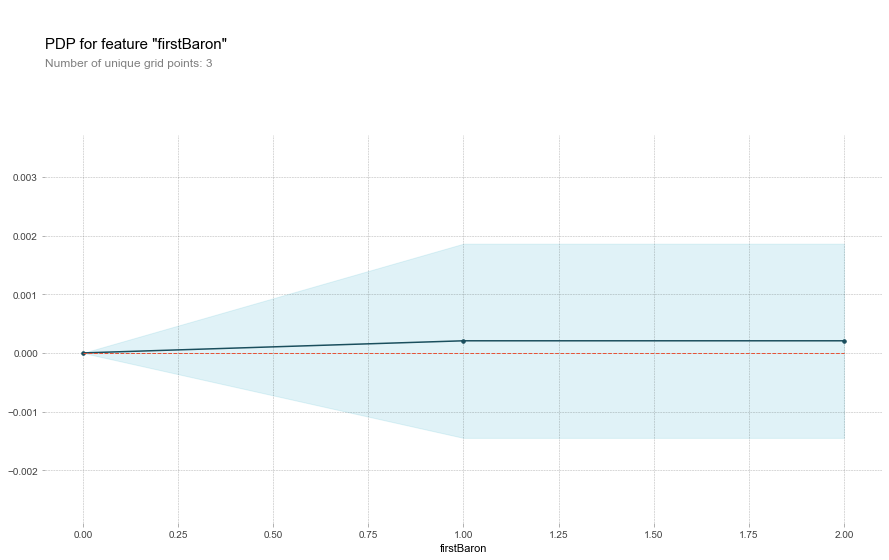

In [203]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

pdp_goals = pdp.pdp_isolate(model=reg, dataset=X, model_features=X.columns.to_list(), feature='firstBaron')

pdp.pdp_plot(pdp_goals, 'firstBaron')
plt.show()

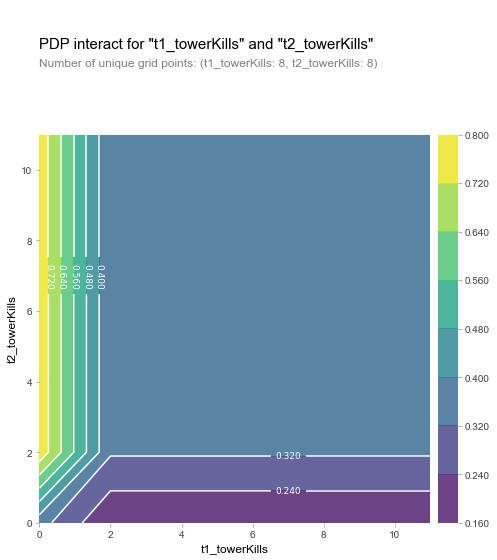

In [209]:
features_to_plot = ['t1_towerKills', 't2_towerKills']
inter1  =  pdp.pdp_interact(model=reg, dataset=X, model_features=X.columns.to_list(), features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

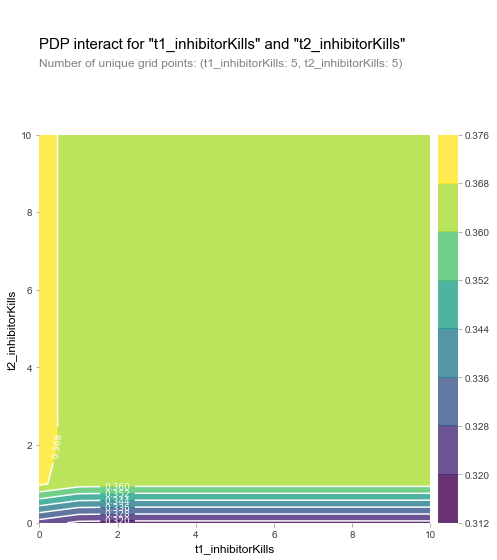

In [19]:
features_to_plot = ['t1_inhibitorKills', 't2_inhibitorKills']
inter1  =  pdp.pdp_interact(model=reg, dataset=X, model_features=X.columns.to_list(), features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [6]:
#决策树建模

In [7]:
df_model = df[['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
              'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills','t1_baronKills',
              't1_dragonKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
              ]] 
df_model.head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,1,2,1,1,1,1,2,11,1,2,3,5,0,0,1
1,1,1,1,1,0,1,1,10,4,0,2,2,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,2,0,0,1
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,3,0,0,1


In [69]:
x = df_model.drop('winner', axis=1)
y = df_model['winner']

X_train, X_test, y_train, y_test = TTS(x, y, test_size=0.2, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(41192, 14) (10298, 14) (41192,) (10298,)


In [9]:
parameters = {
    'splitter': ('best', 'random'),
    'criterion':('gini', 'entropy'),
    'max_depth':[*range(1, 20, 2)],
}

# 建立模型
clf = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'splitter': ('best', 'random')})

In [72]:
print("best score: ", GS.best_score_)
print("best param: ", GS.best_params_) 

best score:  0.9692416978388101
best param:  {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}


In [73]:
best_clf = DecisionTreeClassifier(criterion="entropy", max_depth=7, splitter="best").fit(X_train, y_train) 
y_pred = best_clf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification report : \n', cr)  

TypeError: 'numpy.ndarray' object is not callable

Text(0.5, 1.0, 'confusion_matrix')

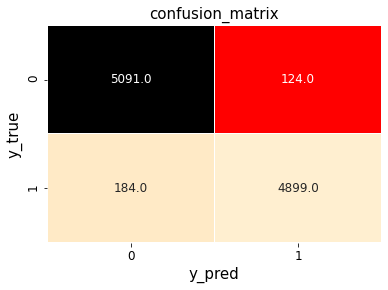

In [54]:
g1 = sns.heatmap(cm, annot=True, fmt=".1f", cmap="flag", linewidths=0.2, cbar=False)
g1.set_ylabel('y_true', fontdict={'fontsize': 15})
g1.set_xlabel('y_pred', fontdict={'fontsize': 15})  
g1.set_title('confusion_matrix', fontdict={'fontsize': 15})  

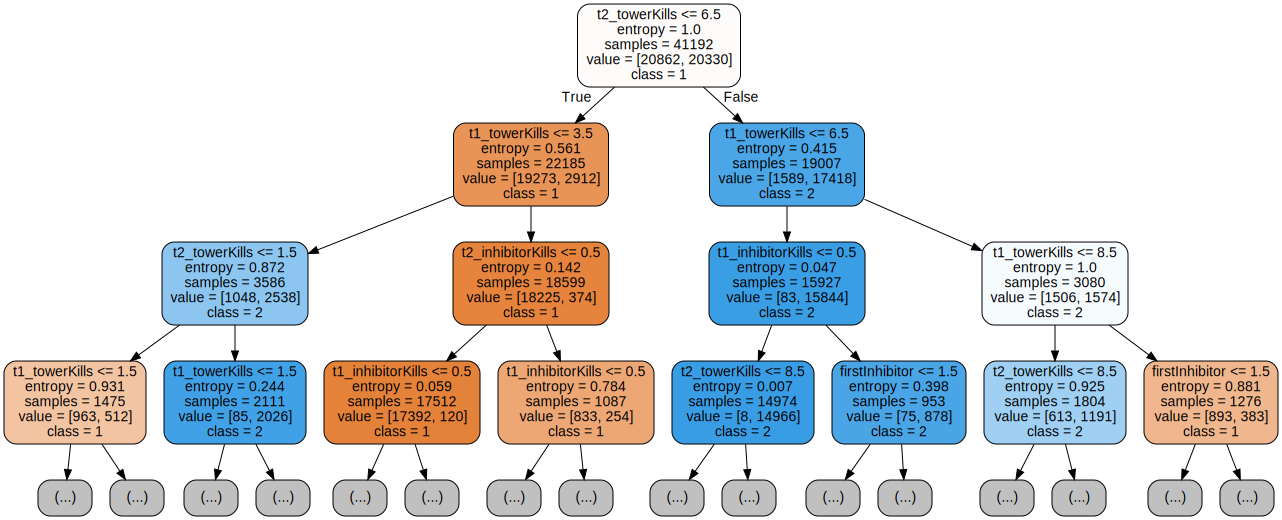

In [13]:
import graphviz
from sklearn import tree 

dot_data = tree.export_graphviz(decision_tree=best_clf, max_depth=3,
                                 out_file=None, 
                                 feature_names=X_train.columns,
                                 class_names=['1', '2'], 
                                 filled=True,
                                 rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

# 选择XGboost最佳模型

In [14]:
X = df.drop(['creationTime','gameId', 'seasonId', 'winner'], 1)
Y = df['winner']

In [15]:
X_std = StandardScaler().fit_transform(X)

In [63]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X_std,Y,test_size=0.1,random_state=420)

In [64]:
Ytrain[Ytrain==1]=0
Ytrain[Ytrain==2]=1
Ytest[Ytest==1]=0
Ytest[Ytest==2]=1

In [24]:
#第二步：调整树结构
param_test1 = {
 'max_depth':range(1,10,1),
 'min_child_weight':range(1,20,2)
}
gsearch1 = GridSearchCV(estimator =XGBC( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(Xtrain,Ytrain)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 8, 'min_child_weight': 3}, 0.9973125823968708)

In [26]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator =XGBC( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(Xtrain,Ytrain)
gsearch1.best_params_, gsearch1.best_score_

({'gamma': 0.0}, 0.9973125823968708)

In [27]:
param_test4 = {
 'subsample':[i/10.0 for i in range(1,10)],
 'colsample_bytree':[i/10.0 for i in range(1,10)]
}
gsearch1 = GridSearchCV(estimator =XGBC( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=3)
gsearch1.fit(Xtrain,Ytrain)
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.9972496387038116)

In [28]:
param_test5 = {
 'learning_rate':[0, 0.001, 0.005, 0.01, 0.05,0.1,0.5,1]
}
gsearch1 = GridSearchCV(estimator =XGBC( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=3)
gsearch1.fit(Xtrain,Ytrain)
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.005}, 0.9972501528850991)

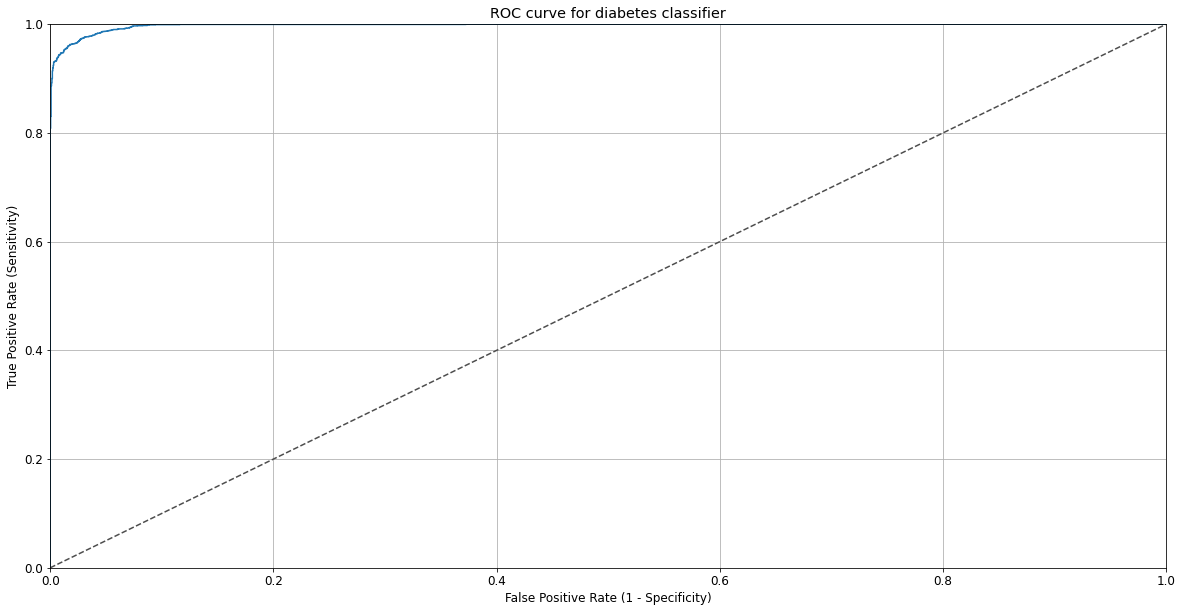

In [52]:
model = gsearch1.best_estimator_
y_predict = model.predict(Xtest)
y_pred_quant = model.predict_proba(Xtest)[:, 1]
y_pred_bin = model.predict(Xtest)
fpr, tpr, thresholds = roc_curve(Ytest, y_pred_quant)
fig, ax = plt.subplots(figsize=[20,10])
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [75]:
model = gsearch1.best_estimator_
model

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.8, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.005, max_delta_step=0, max_depth=8,
                min_child_weight=3, missing=nan, monotone_constraints='()',
                n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=140,
                objective='binary:logistic', random_state=27, reg_alpha=0,
                scale_pos_weight=1, seed=27, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [76]:
import pickle
pickle.dump(model, open("lol_xgboost.dat","wb"))